# 긍정적인 글 분류하기

In [1]:
import pandas as pd

## 긍정사전과 부정사전 가져오기

In [2]:
# 긍정사전과 부정사전 가져오기
pos_df = pd.read_csv("./data/pos_df_test.csv")
neg_df = pd.read_csv("./data/neg_df_test.csv")
# 긍정, 부정 사전  리스트로 변환 
pos_word = pos_df['word'].values.tolist()
neg_word = neg_df['word'].values.tolist()

## "sentiment1"열 추가하기
sentiment1 = 식당-미디어 모든 글의 긍정적인 단어 수 - 부정적인 수

In [3]:
instagram_total = pd.read_csv("./data/instagram/instagramtotal.csv")
for row in range(len(instagram_total)):
    file = "./data/instagram/referenceONLY/" + instagram_total.iloc[row]["restaurant"] + "_" + instagram_total.iloc[row]["mediaName"] + ".csv"
    data = pd.read_csv(file)
    # 해당 파일의 하나의 행에 대한 감정분석
    pos = 0
    neg = 0
    for i in range(len(data)):
        for words in pos_word:
            if words in data.iloc[i]["content"]:
                pos += 1
        for words in neg_word:
            if words in data.iloc[i]["content"]:
                neg += 1
    # 해당 파일의 감정분석 결과 저장
    instagram_total.loc[row, "sentiment1"] = pos - neg
# 파일로 저장
instagram_total.to_csv("./data/instagram/instagramtotal.csv", index=False)

## "sentiment2"열 추가하기
sentiment2 = 식당-미디어 모든 글의 리뷰별 positive 갯수 

In [4]:
# 감정사전이 완료 되지 않았을 때
# 종합 데이터 가져오기
instagram_total = pd.read_csv("./data/instagram/instagramtotal.csv")
instagram_total["sentiment2"] = None
for row in range(len(instagram_total)):
    file = "./data/instagram/referenceONLY/" + instagram_total.iloc[row]["restaurant"] + "_" + instagram_total.iloc[row]["mediaName"] + ".csv"
    data = pd.read_csv(file)
    # 해당 파일의 하나의 행에 대한 감정분석
    data["senti"] = None
    for i in range(len(data)):
        pos = 0
        for words in pos_word:
            if words in data.iloc[i]["content"]:
                pos += 1
        # 각 글의 긍정적인 단어가 1개만 있어도 긍정적인 글입니다.
        if pos > 0:
            data.loc[i,"senti"] = "positive"
        else:
            data.loc[i,"senti"] = "negative"
    # 해당 파일의 감정분석 결과 저장
    # positive가 반이상면 positive
    sentiment2 = len(data.loc[data["senti"] == "positive"]) 
    instagram_total.loc[row, "sentiment2"] = sentiment2
# 파일로 저장
instagram_total.to_csv("./data/instagram/instagramtotal.csv", index=False)

## "sentiment3"열 추가하기
sentiment3 = 식당-미디어 모든 글의 리뷰별 positive - negative 갯수

In [5]:
# 감정사전이 완료 되지 않았을 때
# 종합 데이터 가져오기
instagram_total = pd.read_csv("./data/instagram/instagramtotal.csv")
instagram_total["sentiment3"] = None
for row in range(len(instagram_total)):
    file = "./data/instagram/referenceONLY/" + instagram_total.iloc[row]["restaurant"] + "_" + instagram_total.iloc[row]["mediaName"] + ".csv"
    data = pd.read_csv(file)
    # 해당 파일의 하나의 행에 대한 감정분석
    data["senti"] = None
    for i in range(len(data)):
        pos = 0
        neg = 0 
        for words in pos_word:
            if words in data.iloc[i]["content"]:
                pos += 1
                
        for words in neg_word:
            if words in data.iloc[i]["content"]:
                neg += 1

        # 각 글의 긍정적인 단어가 1개만 있어도 긍정적인 글입니다.
        senti = pos - neg 
        
        if senti >= 0:
            data.loc[i,"senti"] = "positive"
        else:
            data.loc[i,"senti"] = "negative"
    # 해당 파일의 감정분석 결과 저장
    # positive가 반이상면 positive
    sentiment3 = len(data.loc[data["senti"] == "positive"]) - len(data.loc[data["senti"] == "negative"])
    instagram_total.loc[row, "sentiment3"] = sentiment3
# 파일로 저장
instagram_total.to_csv("./data/instagram/instagramtotal.csv", index=False)

In [6]:
display(instagram_total)

,mediaName,restaurant,oldestDate,theDay,updatedDate,before_theDay,after_theDay,countName,reference_before,reference_after,power,reliability2,reliability,group,postsNumber,sentiment1,sentiment2,sentiment3
0,6시내고향,새만금횟집,2016-09-04,2099-12-31,2021-10-21,30433,-28560,0,8,90,-0.063947,100.000000,0.000000,방송프로그램,2506,0.0,0,0
1,6시내고향,바로방,2017-05-15,2099-12-31,2021-10-20,30180,-28561,0,7,93,-0.056473,100.000000,0.000000,방송프로그램,6633,0.0,0,0
2,6시내고향,슬지네찐빵,2018-02-07,2099-12-31,2021-10-21,29912,-28560,0,9,91,-0.047146,100.000000,0.000000,방송프로그램,4386,0.0,0,0
3,6시내고향,메밀꽃필무렵,2021-10-16,2099-12-31,2021-10-21,28565,-28560,0,0,98,-0.000172,100.000000,0.000000,방송프로그램,33575,0.0,0,0
4,6시내고향,원조유박사곱창,2017-11-04,2099-12-31,2021-09-29,30007,-28582,0,98,2,-0.047536,100.000000,0.000000,방송프로그램,203,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,츄릅켠,코카모메,2019-11-25,2099-12-31,2021-10-21,29256,-28560,0,1,199,-0.048734,100.000000,0.000000,유튜버,3527,0.0,0,0
91,츄릅켠,시그니엘부산더뷰,2021-01-09,2021-09-30,2021-10-21,264,21,1,86,12,0.700162,109.090909,8.333333,유튜버,369,-7.0,1,-1
92,츄릅켠,금돼지식당,2021-05-31,2099-12-31,2021-10-21,28703,-28560,0,0,98,-0.004907,100.000000,0.000000,유튜버,27211,0.0,0,0
93,츄릅켠,그랜드조선부산아리아,2020-10-21,2099-12-31,2021-10-21,28925,-28560,0,0,98,-0.012525,100.000000,0.000000,유튜버,241,0.0,0,0


* sentiment1 : 해당 식당 전체 리뷰 긍정단어 - 부정단어
* sentiment2 : 해당 식당 리뷰별 positive 갯수    
* sentiment2 : 해당 식당 리뷰별 positive - negative 갯수 

In [7]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)  

In [9]:
instagram_total = pd.read_csv("./data/instagram/instagramtotal.csv")

In [12]:
df_res_pos = pd.DataFrame(instagram_total.groupby(['mediaName'])['sentiment2'].mean())
df_res_pos = df_res_pos.reset_index()
df_res_pos.columns = ['mediaName', 'positive_avg']

display(df_res_pos)

,mediaName,positive_avg
0,6시내고향,0.000000
1,김준현,3.600000
2,더들리,0.000000
3,맛있는녀석들,0.000000
4,모닝와이드,0.000000
5,문세윤,4.333333
6,백종원,12.600000
7,생방송오늘저녁,0.000000
8,생방송투데이,0.000000
9,생생정보통,0.000000


In [15]:
total_group = instagram_total.copy()

In [16]:
d = total_group[(total_group['sentiment1'] == 0) & (total_group['sentiment2'] == 0) & (total_group['sentiment3'] == 0)].index

total_group.drop(d, inplace = True)

In [17]:
df_group_pos = pd.DataFrame(total_group.groupby(['group'])['sentiment2'].mean())
df_group_pos = df_group_pos.reset_index()
df_group_pos.columns = ['group', 'positive_avg']


In [18]:
display(df_group_pos)

,group,positive_avg
0,방송프로그램,4.8
1,연예인,13.3
2,유튜버,1.0


# 여기 아래로 시각화 작업중 

In [15]:
matplotlib.get_cachedir()

'C:\\Users\\jh367\\.matplotlib'

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트설정
from matplotlib import font_manager, rc
font_path = "./data/font/21582067_G마켓산스Medium_OTF.otf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name() # rc 함수를 통해, rcParams에 사용되는 폰트의 정식명칭을 알 수 있음
print("폰트설정 :", font_name)
rc('font', family=font_name)

# 색깔 설정
my_colors = sns.color_palette("RdPu", 8) + sns.color_palette("Purples", 2) + sns.color_palette("Blues", 10)
my_colors2 = sns.color_palette("RdPu", 1) + sns.color_palette("Purples", 1) + sns.color_palette("Blues", 1)


폰트설정 : Gmarket Sans


In [31]:
import matplotlib 
matplotlib.font_manager._rebuild()

TypeError: xticks() takes from 0 to 2 positional arguments but 3 were given

<Figure size 1152x648 with 0 Axes>

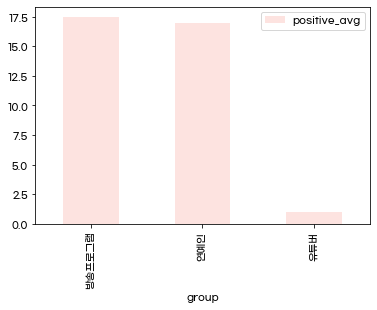

In [41]:
# matplotlib

plt.figure(figsize=(16,9))
df_group_pos.plot(kind='bar', color=my_colors2)
plt.xticks('방송프로그램', '연예인', '유튜버')
plt.xlabel(None)
plt.ylabel(None)
plt.subplots_adjust(bottom=0.2)
plt.show()